In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
from pyod.utils.data import get_outliers_inliers
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


Local Outlier Factor - Synthetic Data 

Generating a synthetic data and applying the local outlier factor algorithm and visualising the results.

In [3]:
from pyod.models.lof import LOF

In [179]:
# Generating Sample Data with equal amounts of global and local anomalies

n_samples = 400
n_features = 2
contamination = 0.25  # 25% of the data will be anomalies
n_anomalies = int(n_samples * contamination)
n_global_anomalies = n_anomalies // 2
n_local_anomalies = n_anomalies - n_global_anomalies

# Generate normal data
np.random.seed(42)
X_normal = 0.3 * np.random.randn(n_samples - n_anomalies, n_features)

# Generate global anomalies
X_global_anomalies = np.random.uniform(low=-6, high=6, size=(n_global_anomalies, n_features))

# Generate local anomalies
X_local_anomalies = 0.3 * np.random.randn(n_local_anomalies, n_features)
X_local_anomalies[:n_local_anomalies // 2] += np.array([1, 1])  # shift half of local anomalies to a local cluster
X_local_anomalies[n_local_anomalies // 2:] += np.array([-1, -1])  # shift the other half to another local cluster

# Combine the data
X_train = np.vstack([X_normal, X_global_anomalies, X_local_anomalies])

# Assign labels
y_train = np.zeros(n_samples)
y_train[-n_anomalies:] = 1

In [180]:
# Training the LOF model

lof = LOF(contamination=contamination)
lof.fit(X_train)

LOF(algorithm='auto', contamination=0.25, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [181]:
# Prediction Labels

y_train_pred = lof.labels_
y_train_score = lof.decision_scores_


In [182]:
X_train_outliers,X_train_inliers = get_outliers_inliers(X_train,y_train_pred)

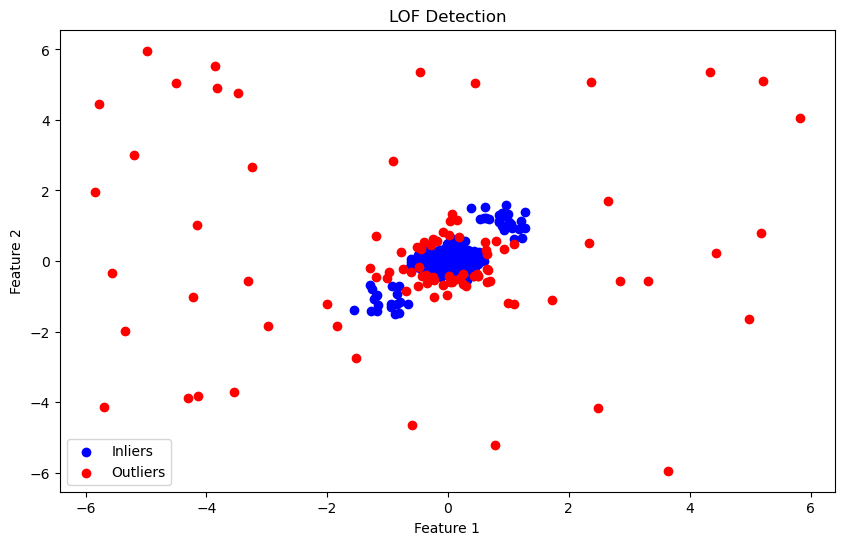

In [183]:
plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_train_inliers[:, 0], X_train_inliers[:, 1], label='Inliers', c='blue')

# Plot outliers
plt.scatter(X_train_outliers[:, 0], X_train_outliers[:, 1], label='Outliers', c='red')

plt.title('LOF Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [184]:
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [185]:
f1 = f1_score(y_train, y_train_pred)
print(f"F1-score: {f1:.2f}")


F1-score: 0.56


In [186]:
roc_auc = roc_auc_score(y_train, y_train_score)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.74


In [187]:
fpr, tpr, _ = roc_curve(y_train, y_train_score)


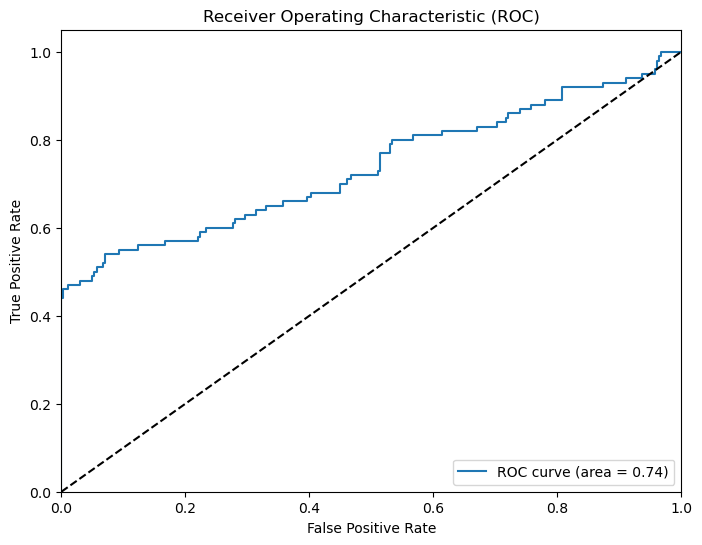

In [188]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [158]:
# Calculate confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate TPR and FPR
tpr_value = tp / (tp + fn)
fpr_value = fp / (fp + tn)

print(f"True Positive Rate (TPR): {tpr_value:.2f}")
print(f"False Positive Rate (FPR): {fpr_value:.2f}")

True Positive Rate (TPR): 0.48
False Positive Rate (FPR): 0.17


In [170]:
# Generating Sample Data with only local anomalies
n_samples = 400
n_features = 2
contamination = 0.1  # 10% of the data will be anomalies
n_anomalies = int(n_samples * contamination)
n_normals = n_samples - n_anomalies  # Number of normal samples

# Generate normal data
np.random.seed(42)
X_normal = 0.5 * np.random.randn(n_normals, n_features)

# Generate local anomalies
X_local_anomalies = 0.3 * np.random.randn(n_anomalies, n_features)
X_local_anomalies[:n_anomalies // 2] += np.array([1, 1])  # Shift half of local anomalies to a local cluster
X_local_anomalies[n_anomalies // 2:] += np.array([-1, -1])  # Shift the other half to another local cluster

# Combine the data
X_train = np.vstack([X_normal, X_local_anomalies])
assert X_train.shape[0] == n_samples, f"Total samples should be {n_samples}, but got {X_train.shape[0]}"

# Assign labels
y_train = np.zeros(n_samples)
y_train[-n_anomalies:] = 1

In [171]:
# Training the LOF model

lof = LOF()
lof.fit(X_train)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [172]:
y_train_pred = lof.labels_
y_train_score = lof.decision_scores_

In [173]:
X_train_outliers,X_train_inliers = get_outliers_inliers(X_train,y_train_pred)

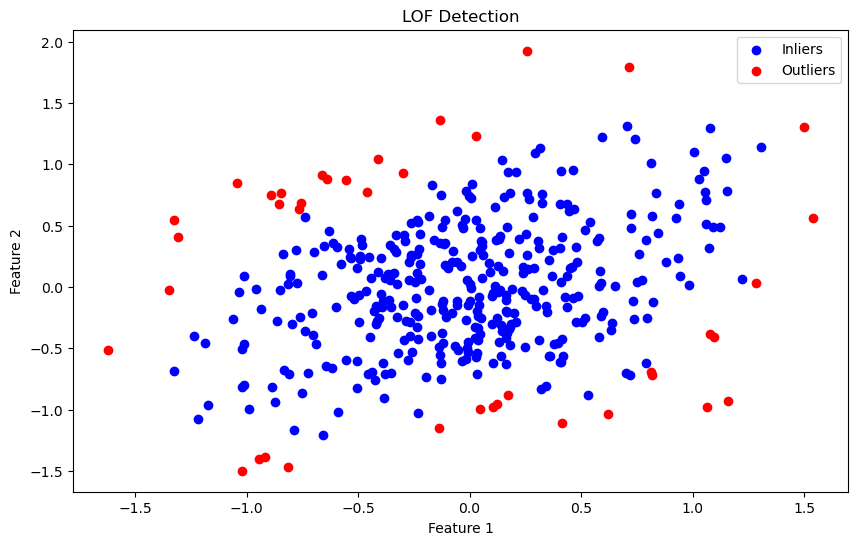

In [174]:
# Visualize the results
plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_train_inliers[:, 0], X_train_inliers[:, 1], label='Inliers', c='blue')

# Plot outliers
plt.scatter(X_train_outliers[:, 0], X_train_outliers[:, 1], label='Outliers', c='red')

plt.title('LOF Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [175]:
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [176]:
roc_auc = roc_auc_score(y_train, y_train_score)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.78


In [177]:
fpr, tpr, _ = roc_curve(y_train, y_train_score)


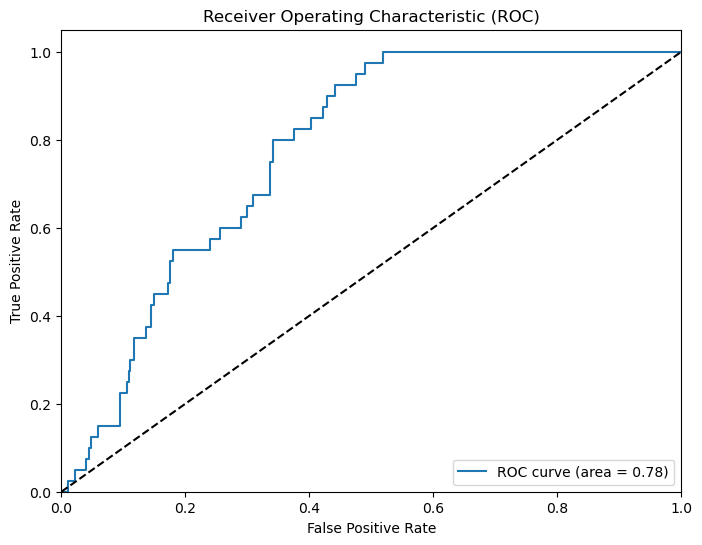

In [178]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()